#### Mounting Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Data Preprocessing

In [5]:
fldr="/content/drive/MyDrive/UTKFace"

In [6]:
import os
files=os.listdir(fldr)


In [7]:
import cv2
ages=[]
genders=[]
images=[]

for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  total=fldr+'/'+fle
  print(total)
  image=cv2.imread(total)

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image= cv2.resize(image,(48,48))
  images.append(image)

  



Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/UTKFace/25_1_1_20170112205215428.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170113001941650.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170113001625270.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170112230445064.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170112234214983.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170112233635032.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170112230722548.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170112205216610.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170116001332046.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170114030910094.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170112235100153.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170112205209506.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170113011606928.jpg.chip.jpg
/content/drive/MyDrive/UTKFace/25_1_1_20170112235144

In [8]:
for fle in files:
  age=int(fle.split('_')[0])
  gender=int(fle.split('_')[1])
  ages.append(age)
  genders.append(gender)

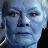

In [9]:
from google.colab.patches import cv2_imshow
cv2_imshow(images[24])

In [10]:
print(ages[24])
print(genders[24])

80
1


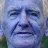

In [11]:
cv2_imshow(images[53])

In [12]:
print(ages[53])
print(genders[53])

81
0


In [13]:
import numpy as np
images_f=np.array(images)
genders_f=np.array(genders)
ages_f=np.array(ages)

In [14]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'gender.npy',genders_f)
np.save(fldr+'age.npy',ages_f)

Male = 0
Female= 1

In [15]:

values, counts = np.unique(genders_f, return_counts=True)
print(counts)

[12389 11328]


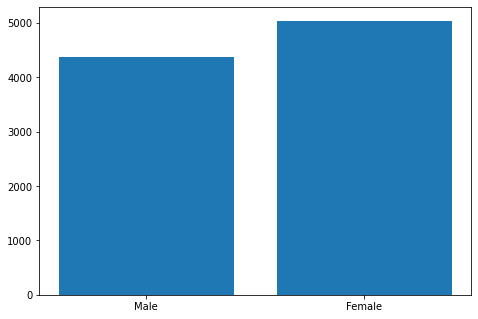

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values=[4372,5047]
ax.bar(gender,values)
plt.show()

In [17]:

values, counts = np.unique(ages_f, return_counts=True)
print(counts)

[1133  483  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  251  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9    1    1
    5    5    1    3    4]


In [18]:
val=values.tolist()
cnt=counts.tolist()

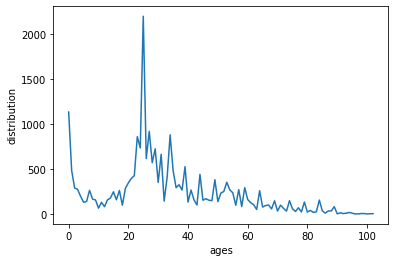

In [19]:
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.show()

In [20]:
labels=[]

i=0
while i<len(ages):
  label=[]
  label.append([ages[i]])
  label.append([genders[i]])
  labels.append(label)
  i+=1

In [21]:
images_f_2=images_f/255

In [22]:
labels_f=np.array(labels)

In [23]:
images_f_2.shape

(23717, 48, 48, 3)

In [24]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_f,test_size=0.25)

In [26]:
Y_train[0:5]

array([[[35],
        [ 0]],

       [[23],
        [ 0]],

       [[ 1],
        [ 0]],

       [[25],
        [ 1]],

       [[23],
        [ 0]]])

In [27]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [28]:
Y_train_2[0][0:5]

array([[0],
       [0],
       [0],
       [1],
       [0]])

In [29]:
Y_train_2[1][0:5]

array([[35],
       [23],
       [ 1],
       [25],
       [23]])

### Model

In [30]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x
def model(input_shape):
  inputs = Input((input_shape))
  
  conv_1= Convolution(inputs,32)
  maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
  conv_2 = Convolution(maxp_1,64)
  maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
  conv_3 = Convolution(maxp_2,128)
  maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
  conv_4 = Convolution(maxp_3,256)
  maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
  flatten= Flatten() (maxp_4)
  dense_1= Dense(64,activation='relu')(flatten)
  dense_2= Dense(64,activation='relu')(flatten)
  drop_1=Dropout(0.2)(dense_1)
  drop_2=Dropout(0.2)(dense_2)
  output_1= Dense(1,activation="sigmoid",name='sex_out')(drop_1)
  output_2= Dense(1,activation="relu",name='age_out')(drop_2)
  model = Model(inputs=[inputs], outputs=[output_1,output_2])
  model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",
	metrics=["accuracy"])
  
  return model


In [31]:
Model=model((48,48,3))

In [32]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 48, 48, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 48, 48, 32)   0           dropout[0][0]                    
______________________________________________________________________________________________

#### Training

In [33]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [34]:
fle_s='Age_sex_detection.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [35]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=500,callbacks=[callback_list])

Epoch 1/500
278/278 [==============================] - 38s 16ms/step - loss: 18.4196 - sex_out_loss: 0.7323 - age_out_loss: 17.4815 - sex_out_accuracy: 0.5187 - age_out_accuracy: 0.0470 - val_loss: 15.1237 - val_sex_out_loss: 0.6912 - val_age_out_loss: 14.2780 - val_sex_out_accuracy: 0.5167 - val_age_out_accuracy: 0.0459

Epoch 00001: val_loss improved from inf to 15.12369, saving model to Age_sex_detection.h5
Epoch 2/500
278/278 [==============================] - 3s 13ms/step - loss: 15.0270 - sex_out_loss: 0.6787 - age_out_loss: 14.1770 - sex_out_accuracy: 0.5461 - age_out_accuracy: 0.0469 - val_loss: 13.4143 - val_sex_out_loss: 0.5941 - val_age_out_loss: 12.5751 - val_sex_out_accuracy: 0.6924 - val_age_out_accuracy: 0.0347

Epoch 00002: val_loss improved from 15.12369 to 13.41434, saving model to Age_sex_detection.h5
Epoch 3/500
278/278 [==============================] - 3s 13ms/step - loss: 11.8435 - sex_out_loss: 0.5762 - age_out_loss: 11.0087 - sex_out_accuracy: 0.6950 - age_out_

### Evaluation

In [36]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 1s 4ms/step - loss: 7.4555 - sex_out_loss: 0.2638 - age_out_loss: 6.2196 - sex_out_accuracy: 0.8914 - age_out_accuracy: 0.0459


[7.455514430999756,
 0.26377376914024353,
 6.219616889953613,
 0.8913996815681458,
 0.045868463814258575]

In [37]:
pred=Model.predict(X_test)

In [38]:
pred[1]

array([[47.084515],
       [25.903994],
       [53.75321 ],
       ...,
       [40.292507],
       [12.515139],
       [40.23397 ]], dtype=float32)

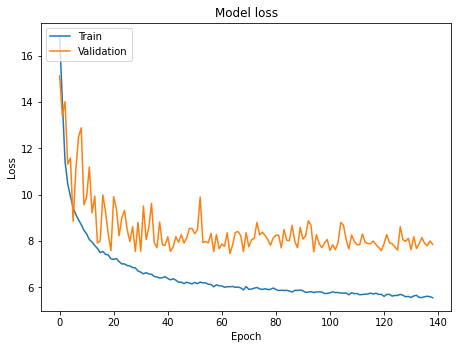

In [39]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

### For Gender

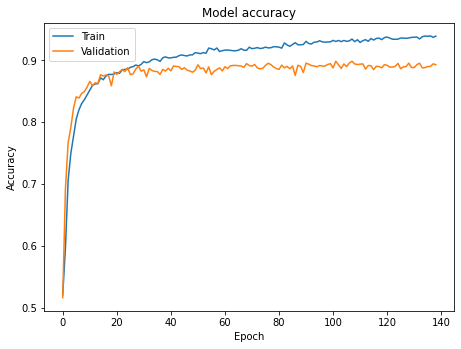

In [40]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplots_adjust(top=1.00, bottom=0.0, left=0.0, right=0.95, hspace=0.25,
                        wspace=0.35)

### For age

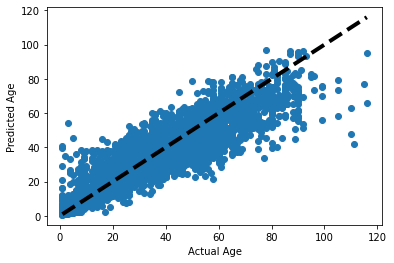

In [41]:
fig, ax = plt.subplots()
ax.scatter(Y_test_2[1], pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()], [Y_test_2[1].min(), Y_test_2[1].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

#### For Gender

In [42]:
i=0
Pred_l=[]
while(i<len(pred[0])):

  Pred_l.append(int(np.round(pred[0][i])))
  i+=1


In [43]:
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import classification_report 

In [44]:

report=classification_report(Y_test_2[0], Pred_l)

In [45]:
print(report)

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      3064
           1       0.88      0.89      0.89      2866

    accuracy                           0.89      5930
   macro avg       0.89      0.89      0.89      5930
weighted avg       0.89      0.89      0.89      5930



In [46]:

results = confusion_matrix(Y_test_2[0], Pred_l)

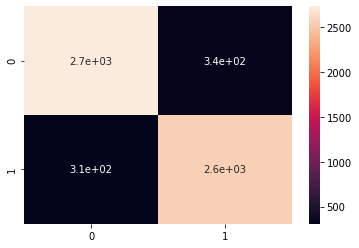

In [47]:
import seaborn as sns

sns.heatmap(results, annot=True)

In [48]:
def test_image(ind,images_f,images_f_2,Model):
  cv2_imshow(images_f[ind])
  image_test=images_f_2[ind]
  pred_1=Model.predict(np.array([image_test]))
  #print(pred_1)
  sex_f=['Male','Female']
  age=int(np.round(pred_1[1][0]))
  sex=int(np.round(pred_1[0][0]))
  print("Predicted Age: "+ str(age))
  print("Predicted Sex: "+ sex_f[sex])



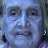

Predicted Age: 81
Predicted Sex: Female


In [49]:
test_image(57,images_f,images_f_2,Model)

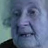

Predicted Age: 77
Predicted Sex: Female


In [50]:
test_image(137,images_f,images_f_2,Model)

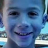

Predicted Age: 6
Predicted Sex: Female


In [51]:
test_image(502,images_f,images_f_2,Model)

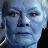

Predicted Age: 80
Predicted Sex: Female


In [52]:
test_image(24,images_f,images_f_2,Model)